In [2]:
%matplotlib inline
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

In [4]:
print('Loading data ...')
cols=[u'train_id', u'name', u'item_condition_id', u'category_name',
       u'brand_name', u'price', u'shipping', u'item_description']
df = pd.read_csv('/Users/zhwei/share/lixianglan/gitrepo/kaggle/mercari/train.tsv', sep='\t')
#tdf=pd.read_csv("/Users/zhwei/share/lixianglan/gitrepo/kaggle/digitRecognizer/test.csv")
# print df['item_condition_id'].value_counts()
# print df['brand_name'].value_counts()
#df.plot(kind="scatter", x="item_condition_id", y="price")
#df.plot(kind="scatter", x="shipping", y="price")
#sns.jointplot(x="item_condition_id",y="price",data=df,size=20)



Loading data ...


In [12]:
df.count()

train_id             1482535
name                 1482535
item_condition_id    1482535
category_name        1476208
brand_name            849853
price                1482535
shipping             1482535
item_description     1482531
dtype: int64

In [20]:
print df.describe()

           train_id  item_condition_id         price      shipping
count  1.482535e+06       1.482535e+06  1.482535e+06  1.482535e+06
mean   7.412670e+05       1.907380e+00  2.673752e+01  4.472744e-01
std    4.279711e+05       9.031586e-01  3.858607e+01  4.972124e-01
min    0.000000e+00       1.000000e+00  0.000000e+00  0.000000e+00
25%    3.706335e+05       1.000000e+00  1.000000e+01  0.000000e+00
50%    7.412670e+05       2.000000e+00  1.700000e+01  0.000000e+00
75%    1.111900e+06       3.000000e+00  2.900000e+01  1.000000e+00
max    1.482534e+06       5.000000e+00  2.009000e+03  1.000000e+00


In [58]:
first=df.loc[df['price']<=10.0]
scond=df.loc[(df['price']<=17.0) & (df['price']>10.0) ]
third=df.loc[(df['price']<=29.0) & (df['price']>17.0)]
four=df.loc[df['price']>29.0]

In [59]:
print first.count()

train_id             376489
name                 376489
item_condition_id    376489
category_name        374831
brand_name           160687
price                376489
shipping             376489
item_description     376486
dtype: int64


In [60]:
print scond.count()

train_id             378177
name                 378177
item_condition_id    378177
category_name        376582
brand_name           210761
price                378177
shipping             378177
item_description     378177
dtype: int64


In [61]:
print third.count()

train_id             359743
name                 359743
item_condition_id    359743
category_name        358131
brand_name           223025
price                359743
shipping             359743
item_description     359743
dtype: int64


In [62]:
print four.count()

train_id             368126
name                 368126
item_condition_id    368126
category_name        366664
brand_name           255380
price                368126
shipping             368126
item_description     368125
dtype: int64


array([[<matplotlib.axes.AxesSubplot object at 0x11db9e3d0>]], dtype=object)

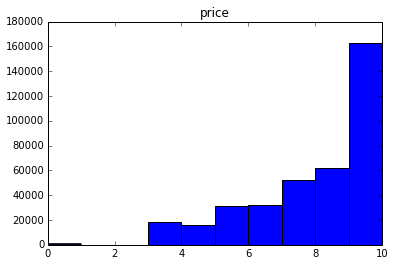

In [63]:
first.hist('price', grid=False)

array([[<matplotlib.axes.AxesSubplot object at 0x11d1b5f10>]], dtype=object)

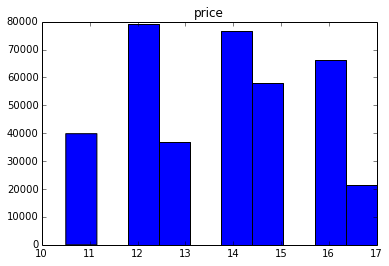

In [64]:
scond.hist('price', grid=False)

array([[<matplotlib.axes.AxesSubplot object at 0x112f09f50>]], dtype=object)

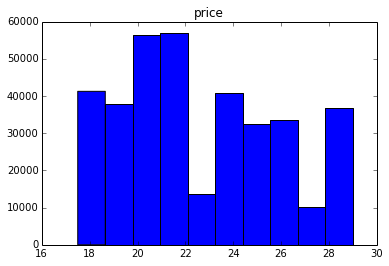

In [65]:
third.hist('price', grid=False)

array([[<matplotlib.axes.AxesSubplot object at 0x114d0f2d0>]], dtype=object)

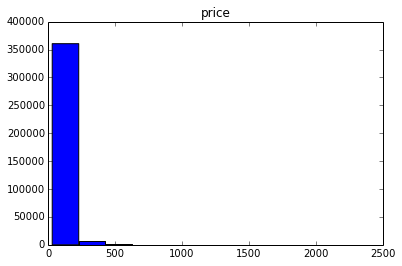

In [66]:
four.hist('price',grid=False)

In [87]:
df.groupby('price')['price'].count().reset_index(name="count")

,price,count
0,0.0,874
1,3.0,18703
2,4.0,16139
3,5.0,31502
4,5.5,33
5,6.0,32260
6,6.5,16
7,7.0,52268
8,7.5,34
9,8.0,61564


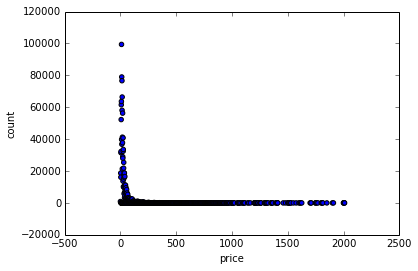

In [89]:
df.groupby('price')['price'].count().reset_index(name="count").plot(kind='scatter',x='price',y='count')

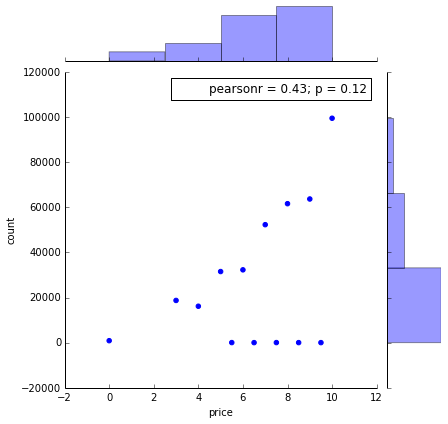

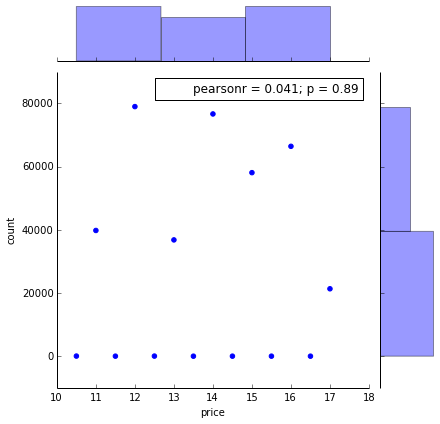

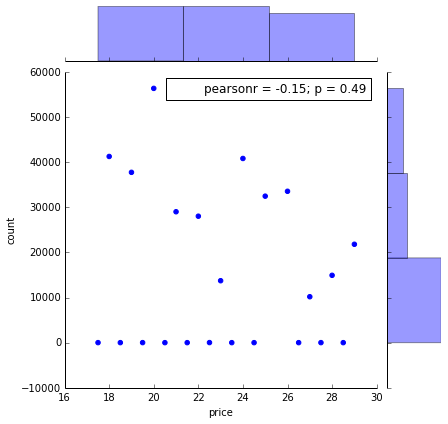

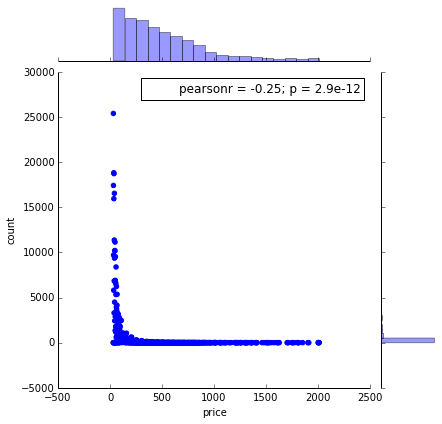

In [81]:
ds=[first,scond,third,four]
for d in ds:
    sns.jointplot(data=d.groupby('price')['price'].count().reset_index(name="count"),x="price",y="count")

ValueError: `dataset` input should have multiple elements.

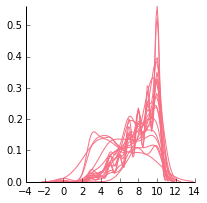

In [92]:
sns.FacetGrid(first, hue="brand_name").map(sns.kdeplot, "price").add_legend()

ValueError: `dataset` input should have multiple elements.

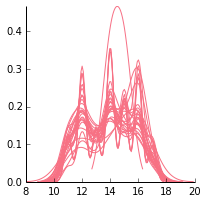

In [93]:
sns.FacetGrid(scond, hue="brand_name").map(sns.kdeplot, "price").add_legend()

ValueError: `dataset` input should have multiple elements.

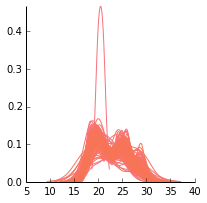

In [94]:
sns.FacetGrid(third, hue="brand_name").map(sns.kdeplot, "price").add_legend()

ValueError: `dataset` input should have multiple elements.

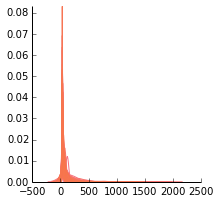

In [95]:
sns.FacetGrid(four, hue="brand_name").map(sns.kdeplot, "price").add_legend()

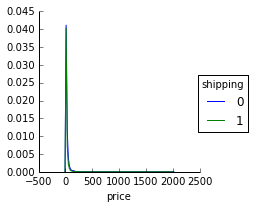

In [97]:
sns.FacetGrid(df, hue="shipping").map(sns.kdeplot, "price").add_legend()

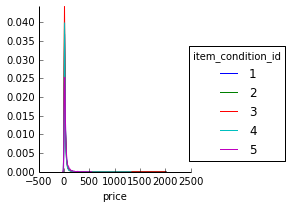

In [98]:
sns.FacetGrid(df, hue="item_condition_id").map(sns.kdeplot, "price").add_legend()

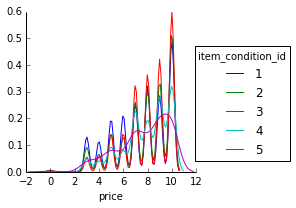

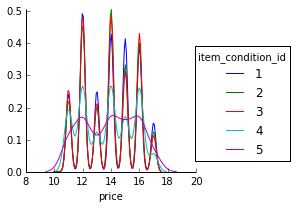

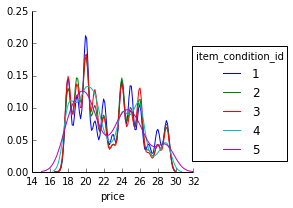

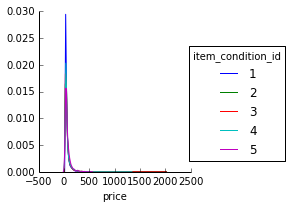

In [99]:
ds=[first,scond,third,four]
for d in ds:
    sns.FacetGrid(d, hue="item_condition_id").map(sns.kdeplot, "price").add_legend()

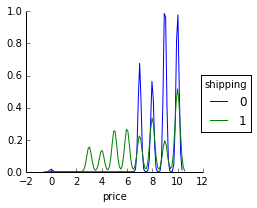

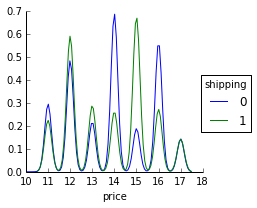

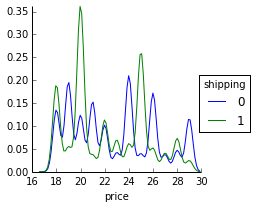

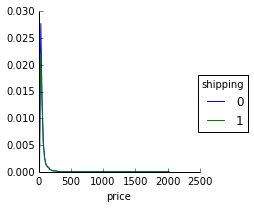

In [100]:
ds=[first,scond,third,four]
for d in ds:
    sns.FacetGrid(d, hue="shipping").map(sns.kdeplot, "price").add_legend()

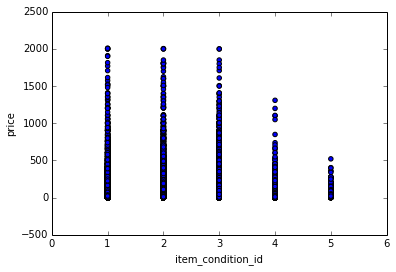

In [48]:
df.plot(kind="scatter", x="item_condition_id", y="price")


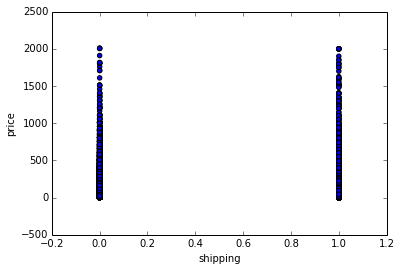

In [49]:
df.plot(kind="scatter", x="shipping", y="price")
